In [1]:
from nnlearn.Network import *
from numba import njit
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
#creating network with 2 hidden layers

np.random.seed(100)

test_net_layers = [
    input_layer(size = 2),
    
    connected_layer(num_neurons = 10, prev_neurons = 2),
    activation_layer(10),
    
    connected_layer(num_neurons = 10, prev_neurons = 10),
    activation_layer(10),
    
    connected_layer(num_neurons = 2, prev_neurons = 10)
    
]

test_net = network(test_net_layers)

In [3]:
#creating data points to learn

x = np.random.uniform(-2,2,(1000,2))

y = np.array([[s[0]*s[1], s[0] + s[1]] for s in x])



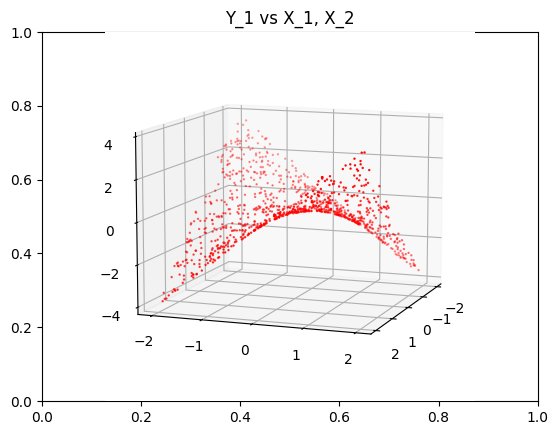

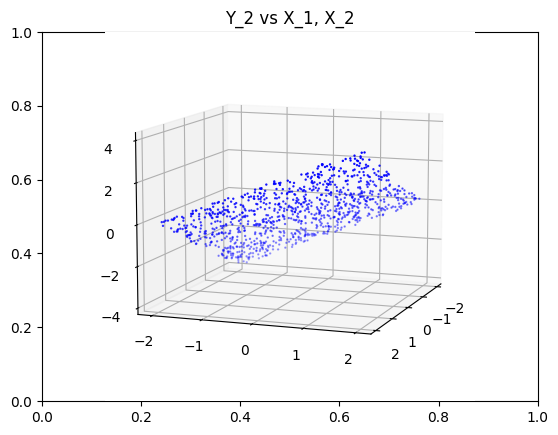

In [4]:
plt.title("Y_1 vs X_1, X_2")

ax = plt.axes(projection = "3d")

ax.scatter(x[:,0], x[:,1], y[:,0], s = .5, color = 'r', label = 'y_1')

ax.view_init(10, 20)
plt.show()


plt.title("Y_2 vs X_1, X_2")
ax = plt.axes(projection = "3d")

ax.scatter(x[:,0], x[:,1], y[:,1], s = .5, color = 'b', label = "y_2")

ax.view_init(10, 20)
plt.show()


In [5]:
start = time()

test_net.minibatch_fit(x, y, batch_size = 1000, epochs = 10000)

end = time()
print("\n\n train time:", round(end-start, 2), "sec")



--------------------
epoch: 1 
 loss: 2.2026
--------------------
epoch: 2001 
 loss: 0.0122
--------------------
epoch: 4001 
 loss: 0.004
--------------------
epoch: 6001 
 loss: 0.0017
--------------------
epoch: 8001 
 loss: 0.0012
--------------------
epoch: 10000 
 loss: 0.0013


 train time: 493.04 sec


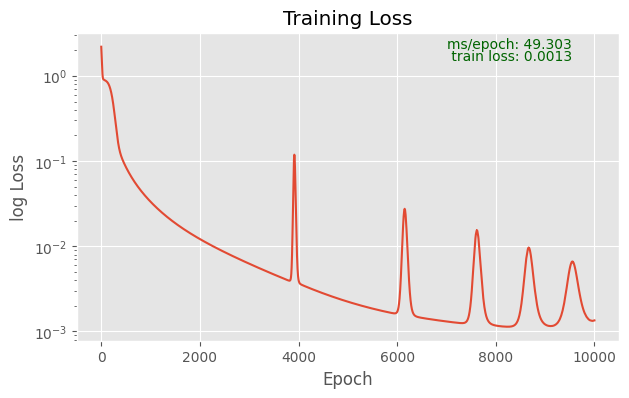

In [9]:
test_net.graph_loss_history()

In [10]:
x_test = np.random.uniform(-2,2,(1000,2))

y_test = np.array([[s[0]*s[1], s[0] + s[1]] for s in x])

y_test_fitted = np.array([test_net.predict(x)  for x in x_test  ])

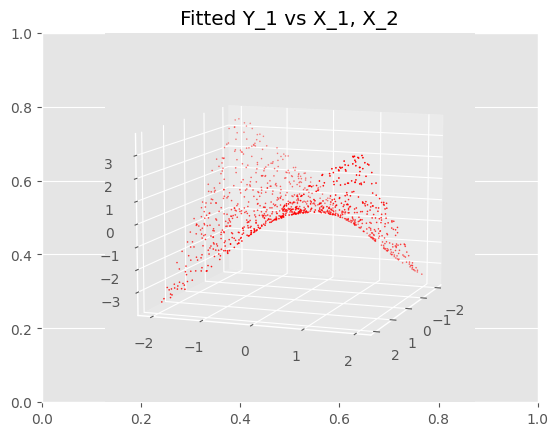

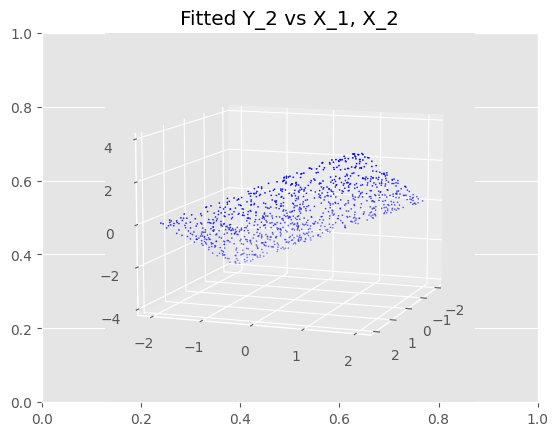

In [11]:
plt.title("Fitted Y_1 vs X_1, X_2")

ax = plt.axes(projection = "3d")

ax.scatter(x_test[:,0], x_test[:,1], y_test_fitted[:,0], s = .5, color = 'r', label = 'y_1')

ax.view_init(10, 20)
plt.show()


plt.title("Fitted Y_2 vs X_1, X_2")
ax = plt.axes(projection = "3d")

ax.scatter(x_test[:,0], x_test[:,1], y_test_fitted[:,1], s = .5, color = 'b', label = "y_2")

ax.view_init(10, 20)
plt.show()